# Anastomotic Leakage Prediction
### Phase 2 - ML Model

https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python

In [1]:
import pandas as pd
import numpy as np
import re
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
from datetime import datetime
from datetime import date 
from scipy import stats
import statsmodels.stats as ss 

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve

### Import data

In [2]:
# RAW DATA
before_surgery_data = pd.read_excel(r'../generated_data/raw-data-before-surgery.xlsx', engine='openpyxl')
# after_surgery_data = pd.read_excel(r'../generated_data/raw-data-after-surgery.xlsx')
# delta = pd.read_excel(r'../generated_data/raw-data-delta-surgery.xlsx')

# ALL FEATURES STATS (CV AND PVALUE)
# stats_before_surgery_data = pd.read_excel(r'../generated_data/stats-before-surgery.xlsx')
# stats_after_surgery_data = pd.read_excel(r'../generated_data/stats-after-surgery.xlsx')
# stats_surgery_data_delta = pd.read_excel(r'../generated_data/stats-delta-surgery.xlsx')

# AFTER WRS STATS (CV AND PVALUE
before_surgery_wrs = pd.read_excel(r'../generated_data/wrs-before-surgery.xlsx', engine='openpyxl')
# after_surgery_final_features_corr = pd.read_excel(r'../generated_data/stats-wrs-after-surgery.xlsx')
# delta_surgery_final_features_corr = pd.read_excel(r'../generated_data/stats-wrs-delta-surgery.xlsx')

# FDR STATS (CV AND PVALUE
# stats_before_surgery_data_fdr = pd.read_excel((r'../generated_data/stats-fdr-before-surgery.xlsx', index = False)
# stats_after_surgery_data_fdr = pd.read_excel((r'../generated_data/stats-fdr-after-surgery.xlsx', index = False)
# stats_surgery_data_delta_fdr = pd.read_excel((r'../generated_data/stats-fdr-delta-surgery.xlsx', index = False)


### Model Functions

In [15]:
def split_data(X,y,fillna):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    if fillna == 'mean':
        X_test.fillna(X_test.mean(),inplace=True)
        X_train.fillna(X_train.mean(),inplace=True)
    return X_train, X_test, y_train, y_test

In [16]:
# Train a Gaussian Naive Bayes classifier on the training set
def nb_model(X_train,y_train):
    # instantiate the model
    gnb = GaussianNB()
    # fit the model
    gnb.fit(X_train, y_train)
    return gnb

def get_preformance(gnb, X_test, y_train, y_test):
    y_pred_test = gnb.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred_test)
    rec_score = recall_score(y_test, y_pred_test)
    prec_score = precision_score(y_test, y_pred_test)
    return y_pred_test, acc_score, rec_score, prec_score

#### Models training

Accuracy is how close a value is to its true value. An example is how close an arrow gets to the bull's-eye center.

Recall the proportion of actual positives that were identified correctly. $$Recall = \frac{TP}{(TP + FN)}$$

Precision the proportion of positive identifications that were actually correct. $$Percision = \frac {TP}{(TP + FP)}$$



##### Before Surgery Only - Removing data with missing values, all features

In [17]:
data = before_surgery_data.dropna(how='any')
print(f'Data Shape {data.shape}')
X_train, X_test, y_train, y_test = split_data(data.drop('Anastomotic Leak', axis=1),
                                              data['Anastomotic Leak'],
                                              fillna = False)
gnb1 = nb_model(X_train,y_train)
y_pred_test, acc_score, rec_score, prec_score = get_preformance(gnb1, X_test, y_train, y_test)

Data Shape (229, 54)


In [18]:
print(f'Accuracy: {acc_score}')
print(f'Recall: {rec_score}')
print(f'Precision: {prec_score}')

Accuracy: 0.5657894736842105
Recall: 0.8333333333333334
Precision: 0.13513513513513514


In [19]:
false_positive_rate1, true_positive_rate1, thresholds1 = roc_curve(y_test, y_pred_test)

##### Before Surgery Only - Replacing missing values with mean, all features

In [20]:
data = before_surgery_data
print(f'Data Shape {data.shape}')
X_train, X_test, y_train, y_test = split_data(data.drop('Anastomotic Leak', axis=1),
                                              data['Anastomotic Leak'],
                                              fillna = 'mean')
gnb2 = nb_model(X_train,y_train)
y_pred_test, acc_score, rec_score, prec_score = get_preformance(gnb2, X_test, y_train, y_test)

Data Shape (524, 54)


In [21]:
print(f'Accuracy: {acc_score}')
print(f'Recall: {rec_score}')
print(f'Precision: {prec_score}')

Accuracy: 0.7225433526011561
Recall: 0.6875
Precision: 0.2037037037037037


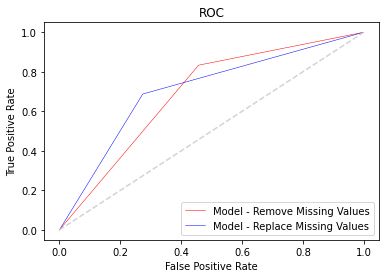

In [24]:
false_positive_rate2, true_positive_rate2, thresholds2 = roc_curve(y_test, y_pred_test)

# Plotting
plt.title('ROC')
plt.plot(false_positive_rate1, true_positive_rate1, color='red',lw=0.5)
plt.plot(false_positive_rate2, true_positive_rate2, color='blue', lw=0.5)
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['Model - Remove Missing Values','Model - Replace Missing Values'])
plt.show()

In [26]:
y_test

310    0
440    0
6      0
184    0
78     0
      ..
116    0
45     0
498    1
393    0
16     0
Name: Anastomotic Leak, Length: 173, dtype: int64

##### Before Surgery Only - Removing data with missing values, WRS features

In [13]:
before_surgery_wrs.head()

,HCT,BMI,LYMPHO (%),Estimated Globulin,Amylase,"Bilirubin, direct",Phosphorus,Chloride,heart rate,Urea,...,RDW,PCT,Potassium,MONO (%),MCV,saturation,Magnesium,Nucleated RBC (%),Nucleated RBC (abs),Anastomotic Leak
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,41.040000,38.8,35.600000,3.000000,53.000000,0.06,3.200000,102.000000,75.500000,24.0,...,14.680000,0.230000,4.300000,6.600000,86.440000,99.000000,2.200000,0.000000,0.000000,0
2,35.210000,NaN,27.600000,2.600000,NaN,NaN,3.600000,101.000000,89.000000,28.0,...,15.205152,0.260000,4.300000,6.300000,71.570000,98.000000,NaN,0.000000,0.000000,0
3,29.750714,23.6,8.014286,2.392857,32.692308,0.18,2.671429,100.142857,94.351145,37.0,...,14.456429,0.241429,3.660263,5.021429,83.272857,96.309524,2.038462,0.685714,0.021429,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.000000,NaN,...,NaN,NaN,3.460000,NaN,NaN,95.000000,NaN,NaN,NaN,0


In [14]:
data = before_surgery_wrs.dropna(how='any')
print(f'Data Shape {data.shape}')
X_train, X_test, y_train, y_test = split_data(data.drop('Anastomotic Leak', axis=1),
                                              data['Anastomotic Leak'],
                                              fillna = False)
gnb3 = nb_model(X_train,y_train)

Data Shape (231, 34)


In [16]:
predict_get_accuracy(gnb3, X_train, X_test, y_train, y_test)

ValueError: operands could not be broadcast together with shapes (77,33) (53,) 

##### Before Surgery Only - Replacing data with mean, WRS features

In [14]:
data = before_surgery_wrs
print(f'Data Shape {data.shape}')
data.head()
X_train, X_test, y_train, y_test = split_data(data.drop('Anastomotic Leak', axis=1),
                                              data['Anastomotic Leak'],
                                              fillna = 'mean')
# print(X_train,y_train)
nb_model(X_train,y_train)

Data Shape (524, 34)


GaussianNB(priors=None, var_smoothing=1e-09)

In [15]:
X_test
predict_get_accuracy(X_train, X_test, y_train, y_test)

Model accuracy score: 0.7341
Training-set accuracy score: 0.7977


##### Before and After Surgery Only - Removing data with missing values, ALL features

In [240]:
# before_after_events = pd.concat([before_surgery_data.add_suffix('_BS'), after_surgery_data.iloc[:,1:].add_suffix('_AS')], axis=1)
# before_after_events

# data = before_after_events
# print(f'Data Shape {before_after_events.shape}')
# data

# X_train, X_test, y_train, y_test = split_data(data.drop('Anastomotic Leak', axis=1),
#                                               data['Anastomotic Leak'],
#                                               fillna = 'mean')
# nb_model(X_train,y_train)
# predict_get_accuracy(X_train, X_test, y_train, y_test)